# SIR Model sur les données du Covid-19

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv("donnees-hospitalieres-covid19-2020-05-05-19h00.csv",sep=';')

In [96]:
print(data.columns)
print(data.dtypes)

Index(['dep', 'sexe', 'jour', 'hosp', 'rea', 'rad', 'dc'], dtype='object')
dep     object
sexe     int64
jour    object
hosp     int64
rea      int64
rad      int64
dc       int64
dtype: object


In [97]:
print("Dates entre", min(data['jour']) , "et",max(data['jour']), ", totale de", data['jour'].nunique(), "jours")

Dates entre 2020-03-18 et 2020-05-05 , totale de 49 jours


In [91]:
df.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [26]:
#df.plot.pie(y='sexe')
#df.sexe.value_counts().plot(kind='pie')

print(df[df['sexe'] == 0]['dc'].sum())
print(df[df['sexe'] == 1]['dc'].sum())
print(df[df['sexe'] == 2]['dc'].sum())

print(df[df['sexe'] == 1]['dc'].sum() + df[df['sexe'] == 2]['dc'].sum())

410431
244626
163116
407742


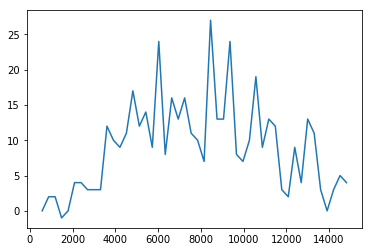

In [85]:
p = df[(df.dep == '91') & (df.sexe ==0) ].dc.diff()

plt.plot(p)

#dc_f = df[(df.jour == '2020-05-05') & (df.sexe ==2) ].dc.sum(

In [59]:
df[(df["dep"] == "91") & (df.sexe == 0)]

AttributeError: 'DataFrame' object has no attribute 'map'

In [41]:
#df['sexe'].plot.hist(bins=10)
df[(df.sexe == 0)].dc.mean().plot.line()
#df[df["dep"] == "91"]

AttributeError: 'float' object has no attribute 'plot'

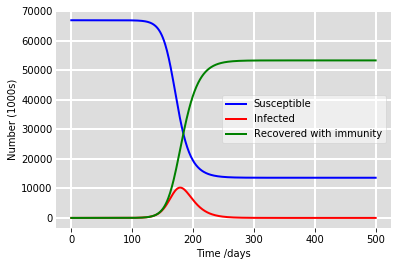

In [52]:
# Total population, N.
N = 66900000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 500, 500)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=1, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=1, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=1, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
SIfor spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [98]:
population = float(46750238)
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = train.loc[train['Country_Region']=='Spain'].ConfirmedCases.diff().fillna(0)
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

NameError: name 'train' is not defined